# Paul's attempt at a simple, tractable 10th percentile mask
My suggestion is to:
- Average through time the frequency data from the first x years (20 would be good to average out variability)
       - This gives us more discrete data values than you have from a single year, and it gets round issues of internal variability
- Use the grid cells that fall in the lowest 10% of values in this dataset as the 10th percentile mask
- Do this spearately for each model (i.e. don't attempt to combine masks). Each CMIP model contains a set of self-consistant physical processes, but these processes may result in subtle differences in the spatial patterns of temperature between models (e.g. different ITCZ possitions).  What we're inteersted in are do the processes that keep an area 'cool' at the present day continue to keep those locations cool into the future, not exactly where are the cool spots assocated with tehse processes (because the real work will be different from any of the models).

In [77]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

### Read the data from matlab files

In [78]:
data = loadmat('/Users/ph290/Downloads/forpaul_29_07_2020/for_paul_CANESM5_585_126_119_29_07_2020.mat')
# select just what looks like the frequency data
data = data['input1']

### Take the time mean of the first x years
where x is defined by variable 'years to mean'

In [79]:
years_to_mean = 20
data_first_x_year_mean = np.nanmean(data[:,:,0:years_to_mean],axis=2)

<ipython-input-79-79b9c318ddf4>:2: RuntimeWarning: Mean of empty slice
  data_first_x_year_mean = np.nanmean(data[:,:,0:years_to_mean],axis=2)


Plot that first 20 year mean just to check looks sensible

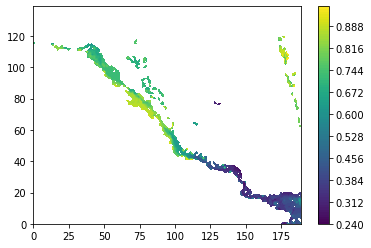

In [80]:
plt.contourf(data_first_x_year_mean,100)
plt.colorbar()

### Identify the value corresponding to the 10th percentile of the data in this time-meaned dataset

In [81]:
tenth_percentile = np.nanpercentile(data_first_x_year_mean, 10)

### Make a copy of the time meaned dataset and set ant values larger than the 10th percentile value to nan 

In [82]:
loc = np.where(data_first_x_year_mean > tenth_percentile)
data_first_x_year_mean_masked = data_first_x_year_mean.copy()
data_first_x_year_mean_masked[loc] = np.nan

### Plot the full map in reds, and the masked map (i.e. that with values falling below the 10th percentile) in greys

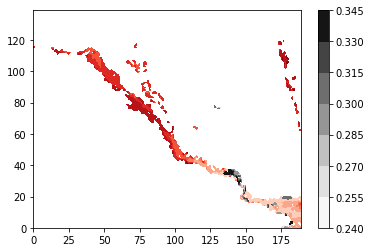

In [83]:
plt.contourf(data_first_x_year_mean,cmap = 'Reds')
plt.contourf(data_first_x_year_mean_masked,cmap = 'Greys')
plt.colorbar()

#### Compare the number of grid points:

In [84]:
full_dataset_no = np.shape(data_first_x_year_mean[np.where(np.isfinite(data_first_x_year_mean))])
masked_dataset_no = np.shape(data_first_x_year_mean_masked[np.where(np.isfinite(data_first_x_year_mean_masked))])

print('number of grid points in full dataset:')
print(full_dataset_no[0])
print('number of grid points in masked dataset:')
print(masked_dataset_no[0])

print('% of gridpoints in masked dataset:')
print((masked_dataset_no[0]/full_dataset_no[0]) * 100.0)

number of grid points in full dataset:
1654
number of grid points in masked dataset:
178
% of gridpoints in masked dataset:
10.76178960096735
